## 合并与分割
### 合并
　　合并是指将多个张量在某个维度上合并为一个张量。以某学校班级成绩册数据为例，
设张量A 保存了某学校1-4 号班级的成绩册，每个班级35 个学生，共8 门科目，则张量A
的shape 为：[4,35,8]；同样的方式，张量B 保存了剩下的6 个班级的成绩册，shape 为
[6,35,8]。通过合并2 个成绩册，便可得到学校所有班级的成绩册张量C，shape 应为
[10,35,8]。这就是张量合并的意义所在。张量的合并可以使用拼接(Concatenate)和堆叠
(Stack)操作实现，拼接并不会产生新的维度，而堆叠会创建新维度。选择使用拼接还是堆
叠操作来合并张量，取决于具体的场景是否需要创建新维度。<br>
　　拼接 在TensorFlow 中，可以通过tf.concat(tensors, axis)，其中tensors 保存了所有需要
合并的张量List，axis 指定需要合并的维度。回到上面的例子，这里班级维度索引号为0，
即axis=0，合并张量A,B 如下：

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
a = tf.random.normal([4,35,8]) # 模拟成绩册A
b = tf.random.normal([6,35,8]) # 模拟成绩册B
tf.concat([a,b], axis=0).shape

TensorShape([10, 35, 8])

　　除了可以在班级维度上进行合并，还可以在其他维度上合并张量。考虑张量A 保存了
所有班级所有学生的前4 门科目成绩，shape 为[10,35,4]，张量B 保存了剩下的4 门科目
成绩，shape 为[10,35,4]，则可以合并shape 为[10,35,8]的总成绩册张量：

In [3]:
a = tf.random.normal([10,35,4])
b = tf.random.normal([10,35,4])
tf.concat([a,b],axis=2).shape # 在科目维度拼接

TensorShape([10, 35, 8])

合并操作可以在任意的维度上进行，唯一的约束是非合并维度的长度必须一致。比如shape
为[4,32,8]和shape 为[6,35,8]的张量则不能直接在班级维度上进行合并，因为学生数维度的
长度并不一致，一个为32，另一个为35：

In [4]:
a = tf.random.normal([4,32,8])
b = tf.random.normal([6,35,8])
#tf.concat([a,b],axis=0) # 非法拼接

　　堆叠 tf.concat 直接在现有维度上面合并数据，并不会创建新的维度。如果在合并数据
时，希望创建一个新的维度，则需要使用tf.stack 操作。考虑张量A 保存了某个班级的成
绩册，shape 为[35,8]，张量B 保存了另一个班级的成绩册，shape 为[35,8]。合并这2 个班
级的数据时，需要创建一个新维度，定义为班级维度，新维度可以选择放置在任意位置，
一般根据大小维度的经验法则，将较大概念的班级维度放置在学生维度之前，则合并后的
张量的新shape 应为[2,35,8]。
　　使用 tf.stack(tensors, axis)可以合并多个张量tensors，其中axis 指定插入新维度的位
置，axis 的用法与tf.expand_dims 的一致，当axis ≥ 0时，在axis 之前插入;当axis < 0时，
在axis 之后插入新维度。例如shape 为[𝑏, 𝑐, ℎ, 𝑤]的张量，在不同位置通过stack 操作插入
新维度，axis 参数对应的插入位置设置如图 5.1 所示：
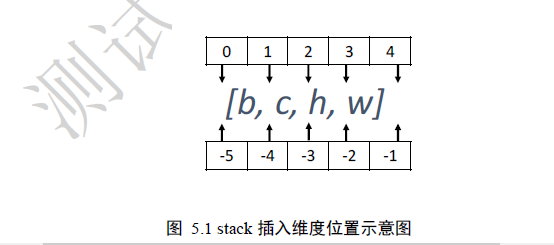
堆叠方式合并这2 个班级成绩册如下

In [5]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
tf.stack([a,b],axis=0).shape # 堆叠合并为2 个班级

TensorShape([2, 35, 8])

同样可以选择在其他位置插入新维度，如在最末尾插入：

In [6]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
tf.stack([a,b],axis=-1).shape

TensorShape([35, 8, 2])

此时班级的维度在axis=2 轴上面，理解时也需要按着最新的维度顺序去理解数据。若选择
使用tf.concat 上述成绩单，则可以合并为：

In [7]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
#tf.concat([a,b],axis=0).shape 拼接方式合并，没有2 个班级的概念

　　tf.concat 也可以顺利合并数据，但是在理解时，需要按着前35 个学生来自第一个班级，后
35 个学生来自第二个班级的方式。在这里，明显通过tf.stack 方式创建新维度的方式更合
理，得到的shape 为[2,35,8]的张量也更容易理解。<br>
　　tf.stack 也需要满足张量堆叠合并条件，它需要所有合并的张量shape 完全一致才可合
并。我们来看张量shape 不一致时进行堆叠合并会发生的错误：

In [8]:
a = tf.random.normal([35,4])
b = tf.random.normal([35,8])
# tf.stack([a,b],axis=-1) # 非法堆叠操作

上述操作尝试合并shape 为[35,4]和[35,8]的2 个张量，由于2 者形状不一致，无法完成合
并操作。

### 分割
　　合并操作的逆过程就是分割，将一个张量分拆为多个张量。继续考虑成绩册的例子，
我们得到整个学校的成绩册张量，shape 为[10,35,8]，现在需要将数据在班级维度切割为
10 个张量，每个张量保存了对应班级的成绩册。
   通过 tf.split(x, axis, num_or_size_splits)可以完成张量的分割操作，其中
❑ x：待分割张量
❑ axis：分割的维度索引号
❑ num_or_size_splits：切割方案。当num_or_size_splits 为单个数值时，如10，表示切割
为10 份；当num_or_size_splits 为List 时，每个元素表示每份的长度，如[2,4,2,2]表示
切割为4 份，每份的长度分别为2,4,2,2
现在我们将总成绩册张量切割为10 份：
In [8]:
x = tf.random.normal([10,35,8])

In [9]:
# 等长切割
x = tf.random.normal([10,35,8])
result = tf.split(x,axis=0,num_or_size_splits=10)
result[0].shape

TensorShape([1, 35, 8])

可以看到，切割后的班级shape 为[1,35,8]，保留了班级维度，这一点需要注意。<br>
　　我们进行不等长的切割：将数据切割为4 份，每份长度分别为[4,2,2,2]:

In [10]:
x = tf.random.normal([10,35,8])
# 自定义长度的切割
result = tf.split(x,axis=0,num_or_size_splits=[4,2,2,2])
# 查看第一个张量的shape，根据我们的切割方案，它应该包含了4 个班级的成绩册：
result[0].shape

TensorShape([4, 35, 8])

特别地，如果希望在某个维度上全部按长度为1 的方式分割，还可以直接使用tf.unstack(x,
axis)。这种方式是tf.split 的一种特殊情况，切割长度固定为1，只需要指定切割维度即
可。例如，将总成绩册张量在班级维度进行unstack：

特别地，如果希望在某个维度上全部按长度为1 的方式分割，还可以直接使用tf.unstack(x,
axis)。这种方式是tf.split 的一种特殊情况，切割长度固定为1，只需要指定切割维度即
可。例如，将总成绩册张量在班级维度进行unstack：

In [11]:
x = tf.random.normal([10,35,8])
result = tf.unstack(x,axis=0)
len(result)

10

查看切割后的张量的形状：

In [12]:
result[0].shape

TensorShape([35, 8])

可以看到，通过tf.unstack 切割后，shape 变为[35,8]，即班级维度消失了，这也是与tf.split
区别之处。

## 数据统计
　　在神经网络的计算过程中，经常需要统计数据的各种属性，如最大值，均值，范数等
等。由于张量通常shape 较大，直接观察数据很难获得有用信息，通过观察这些张量统计
信息可以较轻松地推测张量数值的分布。

### 向量范数
　　向量范数(Vector norm)是表征向量“长度”的一种度量方法，在神经网络中，常用来
表示张量的权值大小，梯度大小等。常用的向量范数有：
❑ L1 范数，定义为向量𝒙的所有元素绝对值之和
$$|x|_1 = \sum_i|x|$$

❑ L2 范数，定义为向量𝒙的所有元素的平方和，再开根号
$$‖𝒙‖_2 = \sqrt{\sum_i[x_i|^2}$$
❑ ∞ −范数，定义为向量𝒙的所有元素绝对值的最大值：
$$‖𝒙‖_∞ = 𝑚𝑎𝑥_i(|𝑥_i|)$$
对于矩阵、张量，同样可以利用向量范数的计算公式，等价于将矩阵、张量打平成向量后
计算。<br>
　　在 TensorFlow 中，可以通过tf.norm(x, ord)求解张量的L1, L2, ∞等范数，其中参数ord
指定为1,2 时计算L1, L2 范数，指定为np.inf 时计算∞ −范数：

In [13]:
x = tf.ones([2,2])
tf.norm(x,ord=1)# 计算L1 范数

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [14]:
tf.norm(x,ord=2) # 计算L2 范数

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [15]:
import numpy as np
tf.norm(x,ord=np.inf) # 计算∞范数

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### 最大最小值、均值、和
　　通过 tf.reduce_max, tf.reduce_min, tf.reduce_mean, tf.reduce_sum 可以求解张量在某个维
度上的最大、最小、均值、和，也可以求全局最大、最小、均值、和信息。<br>
　　考虑 shape 为[4,10]的张量，其中第一个维度代表样本数量，第二个维度代表了当前样
本分别属于10 个类别的概率，需要求出每个样本的概率最大值为：

In [16]:
x = tf.random.normal([4,10])
tf.reduce_max(x,axis=1) # 统计概率维度上的最大值

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.2743244, 1.404152 , 2.4470267, 1.8338467], dtype=float32)>

同样求出每个样本概率的最小值：

In [17]:
tf.reduce_min(x, axis=1) # 统计概率维度上的最小值

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.7123268, -1.2282012, -1.0489168, -1.3809131], dtype=float32)>

求出每个样本的概率的均值：

In [18]:
tf.reduce_mean(x,axis=1) # 统计概率维度上的均值

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.11338934, -0.16105404,  0.22674504,  0.17579333], dtype=float32)>

当不指定axis 参数时，tf.reduce_*函数会求解出全局元素的最大、最小、均值、和：

In [19]:
x = tf.constant([[1,2,3],[4,5,6.0]])
# 统计全局的最大、最小、均值、和
tf.reduce_max(x),tf.reduce_min(x),tf.reduce_mean(x, axis=0)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.5, 3.5, 4.5], dtype=float32)>)

　　在求解误差函数时，通过TensorFlow 的MSE 误差函数可以求得每个样本的误差，需
要计算样本的平均误差，此时可以通过tf.reduce_mean 在样本数维度上计算均值：

In [20]:
out = tf.random.normal([4,10]) # 网络预测输出
y = tf.constant([1,2,2,0]) # 真实标签
y = tf.one_hot(y,depth=10) # one-hot 编码
loss = tf.keras.losses.mse(y,out) # 计算每个样本的误差
loss = tf.reduce_mean(loss) # 平均误差
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.7387788>

　　与均值函数相似的是求和函数tf.reduce_sum(x,axis)，它可以求解张量在axis 轴上所有
特征的和：

In [21]:
out = tf.random.normal([4,10])
tf.reduce_sum(out,axis=-1) # 求和

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.5561805 ,  0.18268502,  1.0518849 ,  2.4463663 ], dtype=float32)>

　　除了希望获取张量的最值信息，还希望获得最值所在的索引号，例如分类任务的标签
预测。考虑10 分类问题，我们得到神经网络的输出张量out，shape 为[2,10]，代表了2 个
样本属于10 个类别的概率，由于元素的位置索引代表了当前样本属于此类别的概率，预测
时往往会选择概率值最大的元素所在的索引号作为样本类别的预测值：

In [22]:
out = tf.random.normal([2,10])
out = tf.nn.softmax(out, axis=1) # 通过softmax 转换为概率值
out

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.45999265, 0.02899059, 0.06703795, 0.0151391 , 0.14351684,
        0.09565711, 0.04597478, 0.07021166, 0.01258483, 0.06089447],
       [0.01637892, 0.2116283 , 0.05096561, 0.02223615, 0.0253121 ,
        0.01464137, 0.30043292, 0.12061322, 0.21090032, 0.02689112]],
      dtype=float32)>

以第一个样本为例，可以看到，它概率最大的索引为𝑖 = 0，最大概率值为0.1877。由于每
个索引号上的概率值代表了样本属于此索引号的类别的概率，因此第一个样本属于0 类的
概率最大，在预测时考虑第一个样本应该最有可能属于类别0。这就是需要求解最大值的
索引号的一个典型应用。<br>
　　通过 tf.argmax(x, axis)，tf.argmin(x, axis)可以求解在axis 轴上，x 的最大值、最小值所
在的索引号：

In [23]:
pred = tf.argmax(out, axis=1) # 选取概率最大的位置
pred

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 6], dtype=int64)>

可以看到，这2 个样本概率最大值都出现在索引3 上，因此最有可能都是类别3，我们将
类别3作为这2 个样本的预测类别。